In [7]:
import numpy as np
import cv2
import sys
import os
sys.path.insert(0, os.path.abspath('..'))

import salientregions as sr
import scipy.io as sio

In [8]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


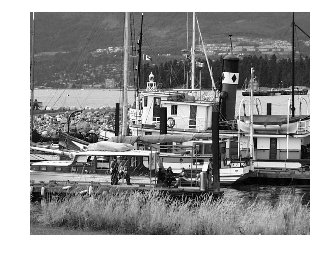

In [9]:
#Load the image
path_to_image = '../tests/images/Gray/Gray_scale.png'
img = cv2.imread(path_to_image, cv2.IMREAD_GRAYSCALE)
sr.show_image(img)

In [10]:
#Check if the image is actually grayscale
path_to_image = '../tests/images/Gray/Gray_scale.png'
img2 = cv2.imread(path_to_image)
print(sr.image_diff(img2[:,:,0], img, visualize=False))
print(sr.image_diff(img2[:,:,1], img, visualize=False))
print(sr.image_diff(img2[:,:,2], img, visualize=False))

True
True
True


In [11]:
SE_size_factor = 0.02
lam_factor = 3
lam = lam_factor * int(np.floor(SE_size_factor * np.sqrt(img.size / np.pi)))
print(lam )
area_factor_large=0.001
area_factor_verylarge=0.01
weights=(0.33, 0.33, 0.33)
offset=80
stepsize=1
connectivity=8

24


In [12]:
binarizer = sr.DatadrivenBinarizer(lam=lam, area_factor_large=area_factor_large, 
                                   area_factor_verylarge=area_factor_verylarge,
                                  weights=weights,
                                  offset=offset,
                                  stepsize=stepsize,
                                  connectivity=connectivity)

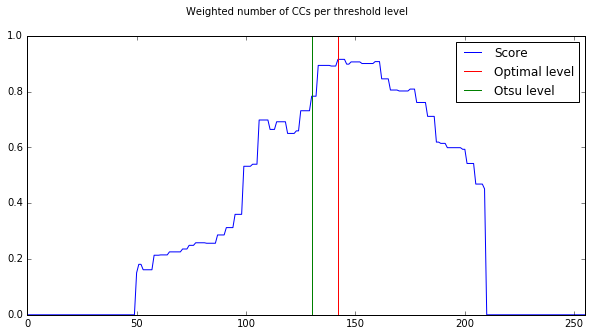

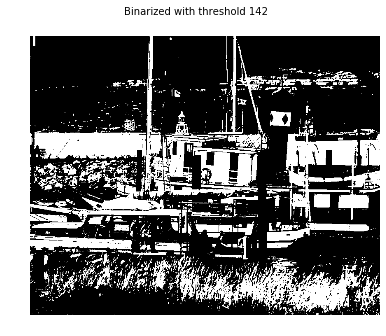

In [13]:
pylab.rcParams['figure.figsize'] = (10., 5.)
t, binarized, scores = binarizer.binarize_withthreshold(img, output_scores=True, visualize=True)

In [14]:
print("threshold: ", t, "true threshold:", 142)

threshold:  142 true threshold: 142


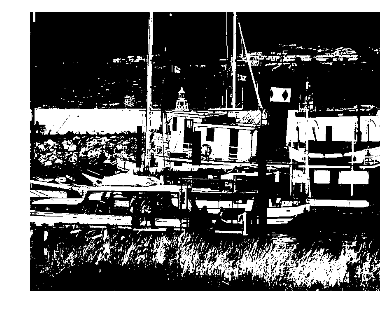

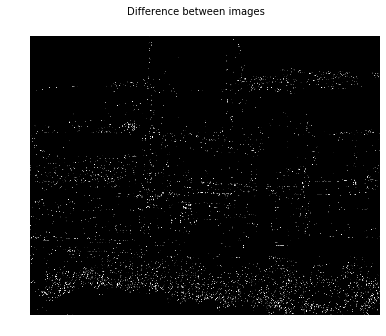

False

In [15]:
binarized_true = cv2.imread('../tests/images/Gray/Binarization_data_driven.png', cv2.IMREAD_GRAYSCALE)
sr.show_image(binarized_true)
sr.image_diff(binarized, binarized_true)

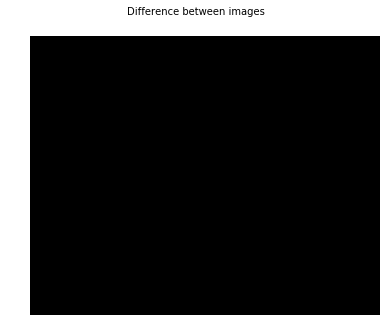

True

In [16]:
#See if the matlab image is binarized according to the threshold that it should
_, binarized146 = cv2.threshold(img, 146, 255, cv2.THRESH_BINARY)
sr.image_diff(binarized146, binarized_true)

146
147


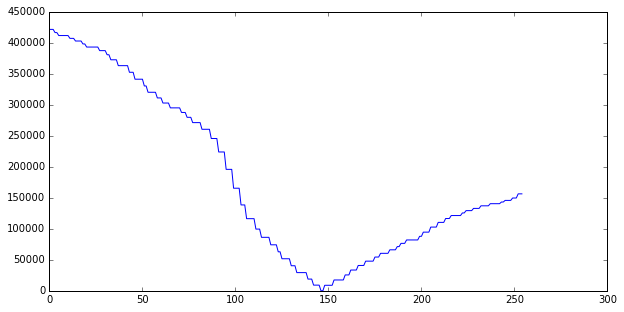

In [17]:
differences = np.zeros(255)
for t in range(0, 255):
    _, binarized_t = cv2.threshold(img, t, 255, cv2.THRESH_BINARY)
    differences[t] = sum(cv2.bitwise_xor(binarized_t, binarized_true))/255
    if sr.image_diff(binarized_t, binarized_true, visualize=False):
       print(t)
plt.plot(differences)

In [18]:
print(differences.argmin(), differences.min())

146 0.0


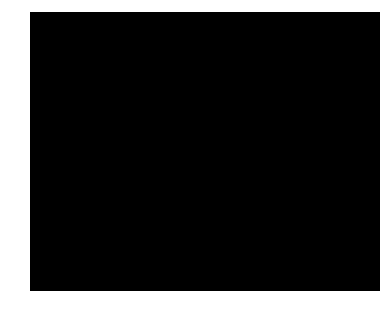

In [19]:
sr.show_image(binarized_t)

In [20]:
import pandas as pd
scores_pd = pd.DataFrame(scores)
scores_pd = scores_pd.set_index('level')
keys = ['a_nccs', 'a_nccs_large', 'a_nccs_verylarge', 'a_nccs_norm', 'a_nccs_large_norm', 'a_nccs_verylarge_norm', 'scores']
scores_pd = scores_pd[keys]
scores_pd[140:150]

,a_nccs,a_nccs_large,a_nccs_verylarge,a_nccs_norm,a_nccs_large_norm,a_nccs_verylarge_norm,scores
level,,,,,,,
140,236.0,30.0,8.0,0.819444,0.882353,1.000,0.891593
141,236.0,30.0,8.0,0.819444,0.882353,1.000,0.891593
142,240.0,32.0,8.0,0.833333,0.941176,1.000,0.915588
143,240.0,32.0,8.0,0.833333,0.941176,1.000,0.915588
144,240.0,32.0,8.0,0.833333,0.941176,1.000,0.915588
145,240.0,32.0,8.0,0.833333,0.941176,1.000,0.915588
146,261.0,32.0,7.0,0.906250,0.941176,0.875,0.898401
147,261.0,32.0,7.0,0.906250,0.941176,0.875,0.898401
148,268.0,32.0,7.0,0.930556,0.941176,0.875,0.906422


In [21]:
scores_matlab_mat1 = sio.loadmat('../tests/features/Gray/Norm_num_cc.mat')
scores_matlab_mat2 = sio.loadmat('../tests/features/Gray/Num_cc_and_max.mat')
print(scores_matlab_mat1.keys())
print(scores_matlab_mat2.keys())

dict_keys(['norm_very_large_num_cc', '__header__', '__version__', '__globals__', 'norm_large_num_cc', 'num_combined_cc', 'norm_num_cc'])
dict_keys(['max_large_num', 'max_very_large_num', '__header__', 'num_large_cc', 'num_cc', '__globals__', 'num_very_large_cc', 'max_num', '__version__'])


In [22]:
keys1 = ['norm_num_cc','norm_large_num_cc','norm_very_large_num_cc', 'num_combined_cc']
keys2 = ['num_cc','num_large_cc','num_very_large_cc']
dic1 = {k: scores_matlab_mat1[k][0] for k in keys1}
dic2 = {k: scores_matlab_mat2[k][0] for k in keys2}
dic1.update(dic2)
scores_matlab = pd.DataFrame(dic1)
scores_matlab = scores_matlab[keys2+keys1]

In [23]:
scores_matlab[140:150]

,num_cc,num_large_cc,num_very_large_cc,norm_num_cc,norm_large_num_cc,norm_very_large_num_cc,num_combined_cc
140,235,30,7,0.818815,0.909091,1.000000,0.900209
141,239,31,7,0.832753,0.939394,1.000000,0.914808
142,239,31,7,0.832753,0.939394,1.000000,0.914808
143,239,31,7,0.832753,0.939394,1.000000,0.914808
144,239,31,7,0.832753,0.939394,1.000000,0.914808
145,260,31,7,0.905923,0.939394,1.000000,0.938955
146,260,31,7,0.905923,0.939394,1.000000,0.938955
147,267,31,6,0.930314,0.939394,0.857143,0.899861
148,267,31,6,0.930314,0.939394,0.857143,0.899861
149,267,31,6,0.930314,0.939394,0.857143,0.899861
